In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 14_06_2022 07_33_53.xlsx')

In [5]:
filtrado = dados[['Sem Epi Internacao','Tem Comorbidade','Doenca Cardiovascular','Obesidade','Diabetes mellitus','Imunodeficiencia','Doenca Renal Cronica','Faixa Etaria','Classificacao final','Houve internacao','Evolucao']]
filtrado['Faixa Etaria'] = filtrado['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
                                                         '40-49 anos':'20-59 anos','50-59 anos':'20-59 anos','60-69 anos':'60 anos ou mais','70-79 anos':'60 anos ou mais',
                                                         '80 e mais anos':'60 anos ou mais'})
filtrado['Doenca Cardiovascular'] = filtrado['Doenca Cardiovascular'].map({1.0:'Doença cardiovascular'})
filtrado['Diabetes mellitus'] = filtrado['Diabetes mellitus'].map({1.0:'Diabetes mellitus'})
filtrado['Obesidade'] = filtrado['Obesidade'].map({'1':'Obesidade'})
filtrado['Imunodeficiencia'] = filtrado['Imunodeficiencia'].map({1.0:'Imunodeficiência'})
filtrado['Doenca Renal Cronica'] = filtrado['Doenca Renal Cronica'].map({1.0:'Doença renal crônica'})

C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_7376/2583967698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Faixa Etaria'] = filtrado['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_7376/2583967698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Doenca Cardiovascular'] = filtrado['Doenca Cardiovascular'].map({1.0:'Doença cardiovascular'})
C:\Users\RYAN-R~1\A

In [6]:
#filtrado = filtrado.sort_values(by='Sem Epi Internacao')
#filtrado = filtrado.set_index('Sem Epi Internacao')
#filtrado = filtrado['2022_13':]
#filtrado

In [7]:
anos59_obito = filtrado.loc[filtrado['Faixa Etaria']=='20-59 anos']
anos59_obito = anos59_obito.loc[anos59_obito['Evolucao']=='Óbito']
anos59_obito = anos59_obito.loc[anos59_obito['Classificacao final']=='COVID-19']

In [8]:
temComorbidade_obito = anos59_obito.loc[anos59_obito['Tem Comorbidade']=='Sim']
temComorbidade_obito = temComorbidade_obito.groupby('Tem Comorbidade').count()
temComorbidade_obito = temComorbidade_obito.drop(temComorbidade_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaCardio_obito = anos59_obito.groupby('Doenca Cardiovascular').count()
doencaCardio_obito = doencaCardio_obito.drop(doencaCardio_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
diabetesmellitus_obito = anos59_obito.groupby('Diabetes mellitus').count()
diabetesmellitus_obito = diabetesmellitus_obito.drop(diabetesmellitus_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
obesidade_obito = anos59_obito.groupby('Obesidade').count()
obesidade_obito = obesidade_obito.drop(obesidade_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
imunodeficiencia_obito = anos59_obito.groupby('Imunodeficiencia').count()
imunodeficiencia_obito = imunodeficiencia_obito.drop(imunodeficiencia_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
renalCronica_obito = anos59_obito.groupby('Doenca Renal Cronica').count()
renalCronica_obito = renalCronica_obito.drop(renalCronica_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
renalCronica_obito

,Houve internacao,Evolucao
Doenca Renal Cronica,,
Doença renal crônica,583,583


In [9]:
totalObitos_anos59 = filtrado.loc[filtrado['Faixa Etaria']=='20-59 anos']
totalObitos_anos59 = totalObitos_anos59.loc[totalObitos_anos59['Evolucao']=='Óbito']
totalObitos_anos59 = totalObitos_anos59.loc[totalObitos_anos59['Classificacao final']=='COVID-19']
totalObitos_anos59 = totalObitos_anos59.groupby('Evolucao').count()
totalObitos_anos59 = totalObitos_anos59.drop(totalObitos_anos59.columns[[0,1,2,3,4,5,6,7]],axis=1)
totalObitos_anos59 = totalObitos_anos59.reset_index()
totalObitos_anos59 = totalObitos_anos59['Houve internacao']
totalObitos_anos59

0    11056
Name: Houve internacao, dtype: int64

In [10]:
juntaAnos59_obito = temComorbidade_obito.append(doencaCardio_obito)
juntaAnos59_obito = juntaAnos59_obito.append(diabetesmellitus_obito)
juntaAnos59_obito = juntaAnos59_obito.append(obesidade_obito)
juntaAnos59_obito = juntaAnos59_obito.append(imunodeficiencia_obito)
juntaAnos59_obito = juntaAnos59_obito.append(renalCronica_obito)
juntaAnos59_obito = juntaAnos59_obito.rename({'Sim':'Alguma comorbidade'})
juntaAnos59_obito = juntaAnos59_obito.reset_index()
juntaAnos59_obito

,index,Houve internacao,Evolucao
0,Alguma comorbidade,8822,8822
1,Doença cardiovascular,3385,3385
2,Diabetes mellitus,2744,2744
3,Obesidade,3209,3209
4,Imunodeficiência,855,855
5,Doença renal crônica,583,583


In [11]:
ordenaAnos59_obito = juntaAnos59_obito.copy()
ordenaAnos59_obito.loc[0] = juntaAnos59_obito.loc[5]
ordenaAnos59_obito.loc[1] = juntaAnos59_obito.loc[4]
ordenaAnos59_obito.loc[2] = juntaAnos59_obito.loc[2]
ordenaAnos59_obito.loc[3] = juntaAnos59_obito.loc[3]
ordenaAnos59_obito.loc[4] = juntaAnos59_obito.loc[1]
ordenaAnos59_obito.loc[5] = juntaAnos59_obito.loc[0]
ordenaAnos59_obito

,index,Houve internacao,Evolucao
0,Doença renal crônica,583,583
1,Imunodeficiência,855,855
2,Diabetes mellitus,2744,2744
3,Obesidade,3209,3209
4,Doença cardiovascular,3385,3385
5,Alguma comorbidade,8822,8822


In [12]:
divisao = pd.DataFrame(columns={'Valores'})
for i in np.arange(0,len(ordenaAnos59_obito),1):
    divisao.loc[i] = totalObitos_anos59.loc[0]
divisao = divisao.fillna(ordenaAnos59_obito)

In [13]:
calcula_anos59_obito = ordenaAnos59_obito['Evolucao']/divisao['Valores']*100
calcula_anos59_obito = calcula_anos59_obito.to_frame()
calcula_anos59_obito = calcula_anos59_obito.rename(columns={0:'Evolucao'})
calcula_anos59_obito = calcula_anos59_obito['Evolucao']
calcula_anos59_obito

0     5.273155
1     7.733357
2    24.819103
3    29.024964
4     30.61686
5    79.793777
Name: Evolucao, dtype: object

In [14]:
anos59_hospi = filtrado.loc[filtrado['Faixa Etaria']=='20-59 anos']
anos59_hospi = anos59_hospi.loc[anos59_hospi['Houve internacao']=='Sim']
anos59_hospi = anos59_hospi.loc[anos59_hospi['Classificacao final']=='COVID-19']

In [15]:
temComorbidade_hospi = anos59_hospi.loc[anos59_hospi['Tem Comorbidade']=='Sim']
temComorbidade_hospi = temComorbidade_hospi.groupby('Tem Comorbidade').count()
temComorbidade_hospi = temComorbidade_hospi.drop(temComorbidade_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaCardio_hospi = anos59_hospi.groupby('Doenca Cardiovascular').count()
doencaCardio_hospi = doencaCardio_hospi.drop(doencaCardio_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
diabetesmellitus_hospi = anos59_hospi.groupby('Diabetes mellitus').count()
diabetesmellitus_hospi = diabetesmellitus_hospi.drop(diabetesmellitus_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
obesidade_hospi = anos59_hospi.groupby('Obesidade').count()
obesidade_hospi = obesidade_hospi.drop(obesidade_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
imunodeficiencia_hospi = anos59_hospi.groupby('Imunodeficiencia').count()
imunodeficiencia_hospi = imunodeficiencia_hospi.drop(imunodeficiencia_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
renalCronica_hospi = anos59_hospi.groupby('Doenca Renal Cronica').count()
renalCronica_hospi = renalCronica_hospi.drop(renalCronica_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
renalCronica_hospi

,Houve internacao,Evolucao
Doenca Renal Cronica,,
Doença renal crônica,1442,1442


In [16]:
totalHospi_anos59 = filtrado.loc[filtrado['Faixa Etaria']=='20-59 anos']
totalHospi_anos59 = totalHospi_anos59.loc[totalHospi_anos59['Houve internacao']=='Sim']
totalHospi_anos59 = totalHospi_anos59.loc[totalHospi_anos59['Classificacao final']=='COVID-19']
totalHospi_anos59 = totalHospi_anos59.groupby('Houve internacao').count()
totalHospi_anos59 = totalHospi_anos59.drop(totalHospi_anos59.columns[[0,1,2,3,4,5,6,7]],axis=1)
totalHospi_anos59 = totalHospi_anos59.reset_index()
totalHospi_anos59 = totalHospi_anos59['Evolucao']
totalHospi_anos59

0    59629
Name: Evolucao, dtype: int64

In [17]:
juntaAnos59_hospi = temComorbidade_hospi.append(doencaCardio_hospi)
juntaAnos59_hospi = juntaAnos59_hospi.append(diabetesmellitus_hospi)
juntaAnos59_hospi = juntaAnos59_hospi.append(obesidade_hospi)
juntaAnos59_hospi = juntaAnos59_hospi.append(imunodeficiencia_hospi)
juntaAnos59_hospi = juntaAnos59_hospi.append(renalCronica_hospi)
juntaAnos59_hospi = juntaAnos59_hospi.rename({'Sim':'Alguma comorbidade'})
juntaAnos59_hospi = juntaAnos59_hospi.reset_index()
juntaAnos59_hospi

,index,Houve internacao,Evolucao
0,Alguma comorbidade,33974,33974
1,Doença cardiovascular,12574,12574
2,Diabetes mellitus,9083,9083
3,Obesidade,10577,10577
4,Imunodeficiência,2003,2003
5,Doença renal crônica,1442,1442


In [18]:
ordenaAnos59_hospi = juntaAnos59_hospi.copy()
ordenaAnos59_hospi.loc[0] = juntaAnos59_hospi.loc[5]
ordenaAnos59_hospi.loc[1] = juntaAnos59_hospi.loc[4]
ordenaAnos59_hospi.loc[2] = juntaAnos59_hospi.loc[2]
ordenaAnos59_hospi.loc[3] = juntaAnos59_hospi.loc[3]
ordenaAnos59_hospi.loc[4] = juntaAnos59_hospi.loc[1]
ordenaAnos59_hospi.loc[5] = juntaAnos59_hospi.loc[0]
ordenaAnos59_hospi

,index,Houve internacao,Evolucao
0,Doença renal crônica,1442,1442
1,Imunodeficiência,2003,2003
2,Diabetes mellitus,9083,9083
3,Obesidade,10577,10577
4,Doença cardiovascular,12574,12574
5,Alguma comorbidade,33974,33974


In [19]:
divisao = pd.DataFrame(columns={'Valores'})
for i in np.arange(0,len(ordenaAnos59_hospi),1):
    divisao.loc[i] = totalHospi_anos59.loc[0]
divisao = divisao.fillna(ordenaAnos59_hospi)

In [20]:
calcula_anos59_hospi = ordenaAnos59_hospi['Evolucao']/divisao['Valores']*100
calcula_anos59_hospi = calcula_anos59_hospi.to_frame()
calcula_anos59_hospi = calcula_anos59_hospi.rename(columns={0:'Evolucao'})
calcula_anos59_hospi = calcula_anos59_hospi['Evolucao']
calcula_anos59_hospi

0     2.418286
1     3.359104
2    15.232521
3    17.738013
4    21.087055
5    56.975633
Name: Evolucao, dtype: object

In [21]:
comorbidade = ordenaAnos59_obito['index']

In [22]:
legenda = pd.DataFrame(columns=['Óbito','Hospitalização'])

In [23]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

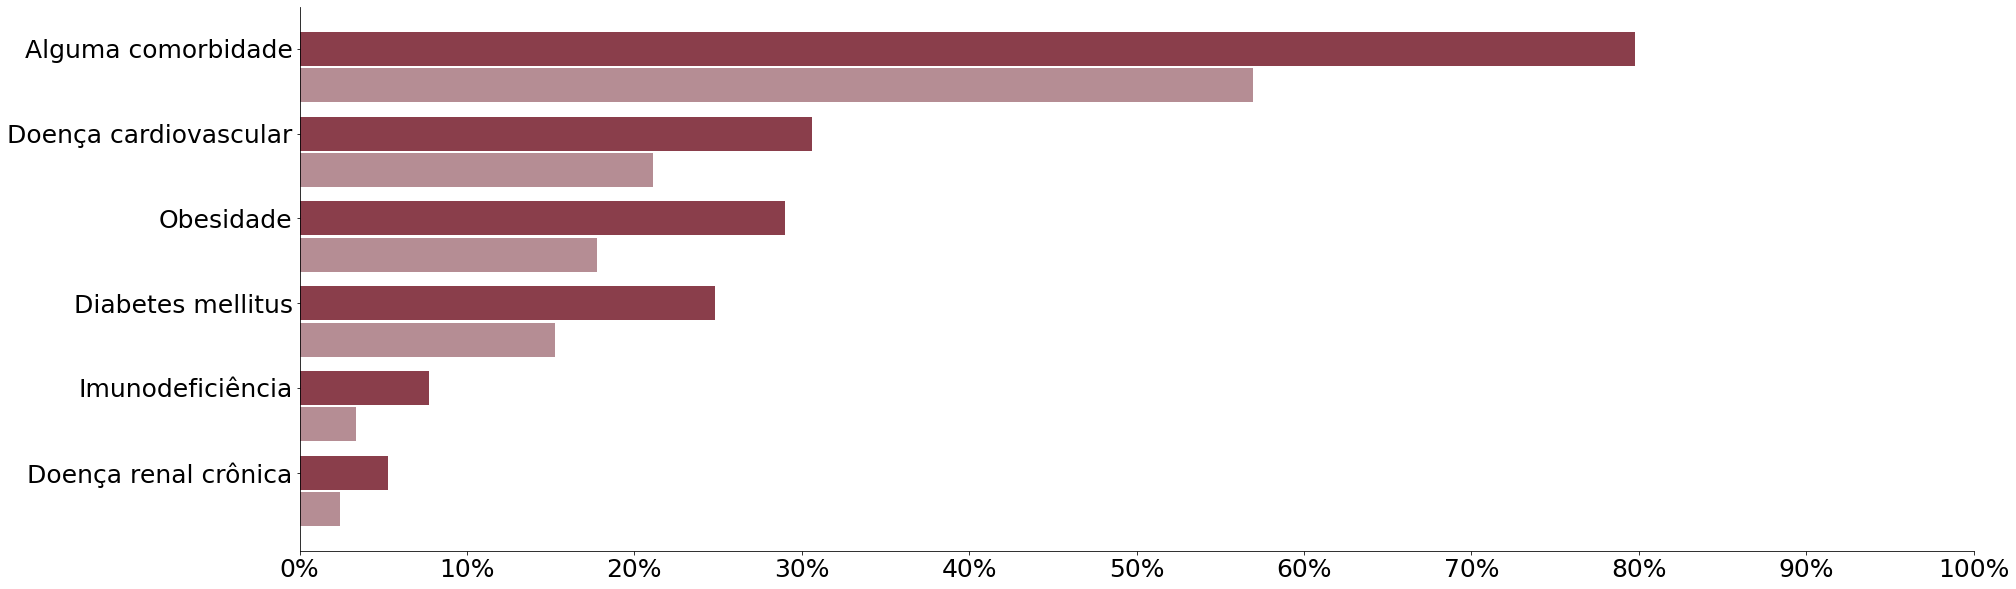

In [24]:
plt.figure(figsize=(30,10))
width=0.4
plt.barh(comorbidade,calcula_anos59_obito,width,color='#8a3e4b')
plt.barh(np.arange(0,np.size(comorbidade),1)-0.43,calcula_anos59_hospi,width,color='#b58d94')
sns.despine()
plt.xticks(np.arange(0,110,10),fontsize=25)
plt.yticks(fontsize=25)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_xticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/comorb_Covid_20-59.png',dpi=720,bbox_inches='tight')